# Tugas Akhir | Analisis

## 1. Load Dataset

In [ ]:
!pip install gdown
!pip install wordcloud

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Download the dataset and load it into a pandas DataFrame
!gdown 18pZ7VOhKat2CbOLPfyGVaZRXhaXgBTyh
# Load dataset
file_path = 'PROMISE_exp.csv'
text_req = pd.read_csv(file_path)
text_req.head()

Downloading...
From: https://drive.google.com/uc?id=18pZ7VOhKat2CbOLPfyGVaZRXhaXgBTyh
To: /content/PROMISE_exp.csv
100% 113k/113k [00:00<00:00, 59.2MB/s]


,ProjectID,RequirementText,_class_
0,1,The system shall refresh the display every 60 ...,PE
1,1,The application shall match the color of the s...,LF
2,1,If projected the data must be readable. On a...,US
3,1,The product shall be available during normal b...,A
4,1,If projected the data must be understandable....,US


## 2. Explore dataset attribute

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import spacy
from nltk.corpus import stopwords
import pickle

In [ ]:
# Menampilkan 3 baris pertama untuk setiap label di atribut "_class_"
result = text_req.groupby("_class_").head(1)

In [ ]:
result

,ProjectID,RequirementText,_class_
0,1,The system shall refresh the display every 60 ...,PE
1,1,The application shall match the color of the s...,LF
2,1,If projected the data must be readable. On a...,US
3,1,The product shall be available during normal b...,A
5,1,The product shall ensure that it can only be a...,SE
8,1,The system shall have a MDI form that allows f...,F
44,2,The product shall operate in offline mode when...,FT
48,2,The product shall be able to support multiple ...,SC
53,2,The product is expected to run on Windows CE a...,PO
84,3,The system shall able to operate within a busi...,O


In [ ]:
text_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProjectID        969 non-null    int64 
 1   RequirementText  969 non-null    object
 2   _class_          969 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.8+ KB


## 3. Explore dataset Category

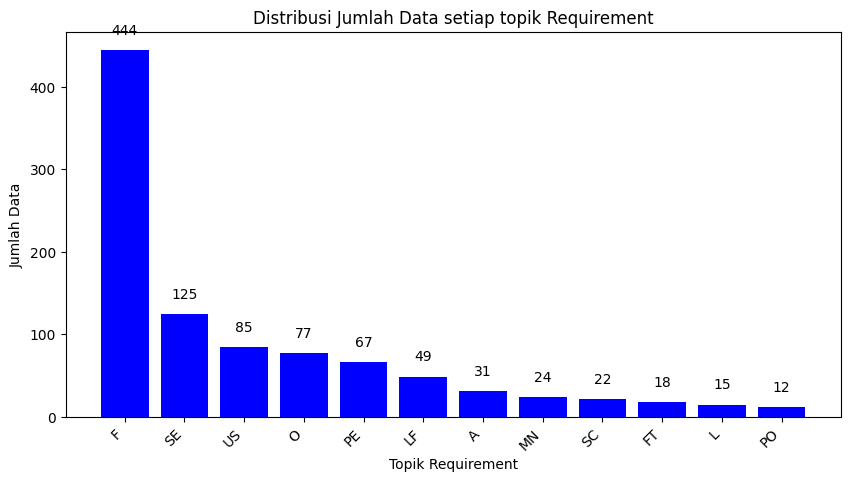

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah data untuk setiap label unik di kolom _class_
class_counts = text_req['_class_'].value_counts()

# Warna batang tetap sama
bar_color = 'blue'

# Membuat plot distribusi
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(class_counts.index, class_counts.values, color=bar_color)

# Menambahkan nilai pada setiap batang bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 9),  # Menambahkan offset vertikal
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=10, color='black')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Jumlah Data setiap topik Requirement')
plt.xlabel('Topik Requirement')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45, ha='right')  # Rotasi label x agar lebih terbaca

# Menampilkan grafik
plt.show()

### (PREPARATION) Data Stopwords and Tokenizer

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Memuat model bahasa Inggris dari spaCy
nlp = spacy.load('en_core_web_sm')

# Mengambil daftar stop words dari NLTK
stop_words = set(stopwords.words('english'))

# Fungsi untuk tokenisasi dan lemmatization dengan penghilangan stop words
def preprocess_text(text):
    # Menggunakan spaCy untuk tokenisasi dan lemmatization
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text.lower() not in stop_words and not token.is_punct]
    return " ".join(tokens)

# Terapkan preprocessing pada kolom 'Contoh Requirement' di dataset fr
text_req['Processed_Requirement'] = text_req['RequirementText'].apply(preprocess_text)



## 4.	Explore the distribution of datasets textually

### Dataset Word Cloud

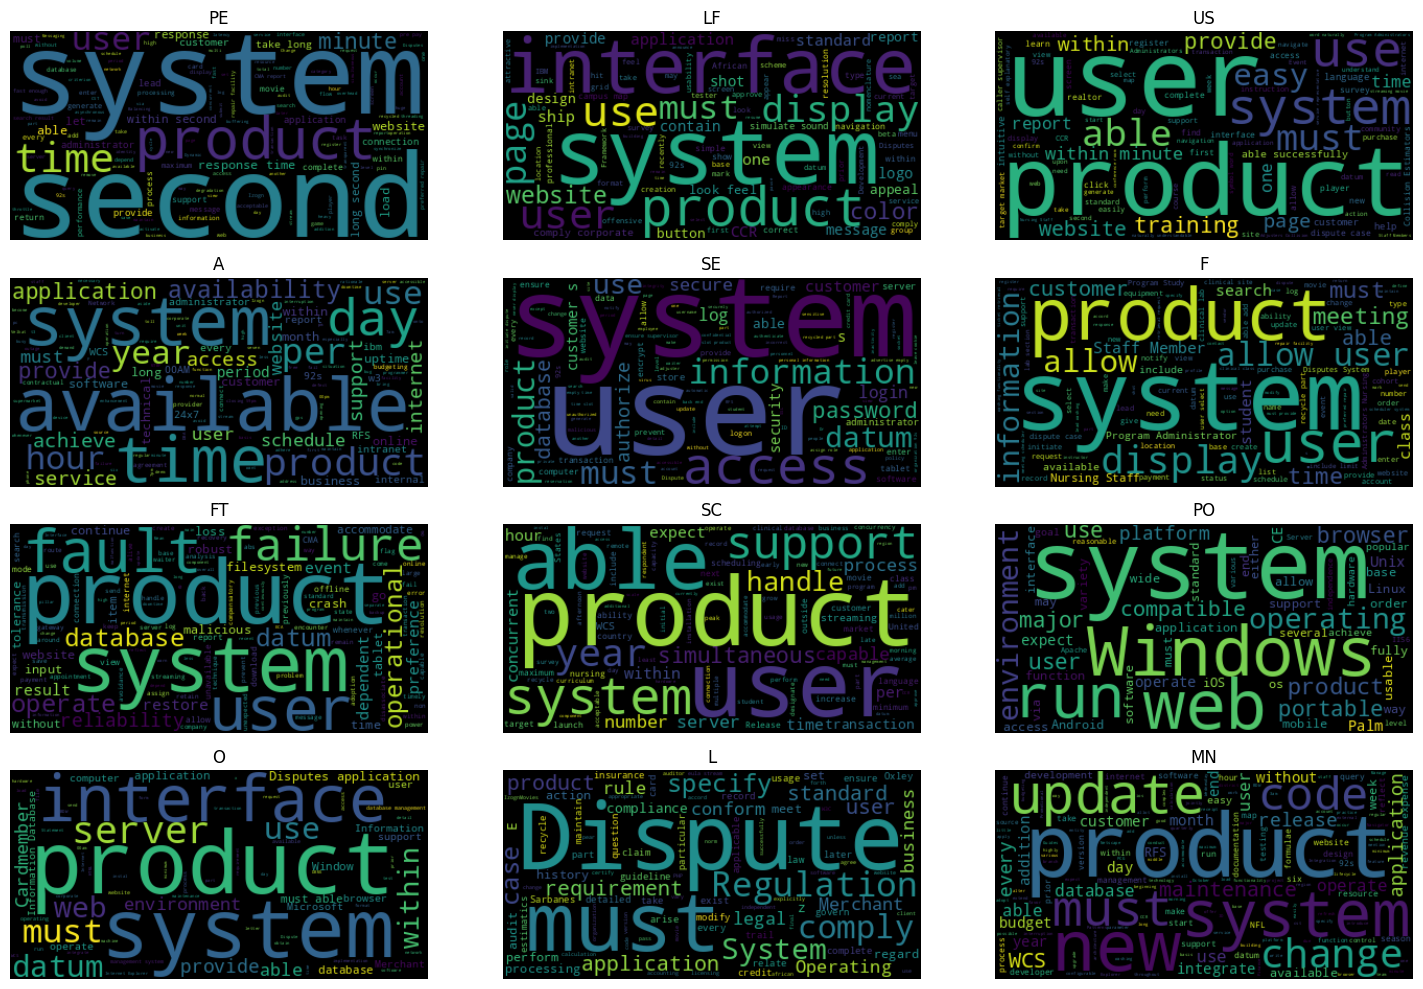

In [ ]:
# Ambil daftar unik kategori dari kolom '_class_'
categories = text_req['_class_'].unique()

# Atur ukuran figure untuk menampung beberapa plot
plt.figure(figsize=(15, 10))

# Loop melalui setiap kategori dan buat word cloud
for i, category in enumerate(categories, 1):
    # Filter data berdasarkan kategori
    text = " ".join(text_req[text_req['_class_'] == category]['Processed_Requirement'])

    # Buat word cloud
    wordcloud = WordCloud().generate(text)

    # Tambahkan subplot untuk setiap kategori
    plt.subplot(4, 3, i)  # Baris dan kolom subplot, sesuaikan dengan jumlah kategori
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(category)
    plt.axis("off")

# Tampilkan seluruh plot
plt.tight_layout()
plt.show()

### Get Top Words Function

In [ ]:
# Fungsi untuk mendapatkan kata paling sering muncul pada kategori tertentu
def get_top_words(data, n=10):
    # Menggabungkan seluruh teks dalam kategori menjadi satu string
    all_words = " ".join(data).split()
    # Menghitung frekuensi kata
    most_common = Counter(all_words).most_common(n)
    return [word for word, freq in most_common]

# Mengelompokkan berdasarkan kategori dan mendapatkan kata-kata paling umum
top_words_req_per_category = text_req.groupby('_class_')['Processed_Requirement'].apply(lambda x: get_top_words(x, n=10))

# Menampilkan hasil kata kunci per kategori
print(top_words_req_per_category)


_class_
A     [available, shall, system, time, day, product,...
F     [shall, system, user, product, allow, display,...
FT    [shall, product, system, user, fault, operate,...
L     [must, shall, comply, Disputes, specify, dispu...
LF    [shall, system, product, interface, use, displ...
MN    [product, shall, new, system, update, must, co...
O     [shall, product, system, interface, must, serv...
PE    [shall, second, time, system, product, respons...
PO    [system, Windows, web, run, operating, shall, ...
SC    [shall, product, user, able, system, 000, supp...
SE    [shall, user, system, access, information, pro...
US    [shall, user, product, use, system, able, must...
Name: Processed_Requirement, dtype: object


### Get top ngrams Function

In [ ]:
# Fungsi untuk mendapatkan n-gram teratas (bigram, trigram)
def get_top_ngrams(data, vectorizer, n=10):
    # Menggunakan CountVectorizer untuk mengonversi teks menjadi fitur n-gram
    ngram_matrix = vectorizer.fit_transform(data)

    # Mengonversi hasil menjadi array dan menghitung frekuensi n-gram
    ngram_freq = ngram_matrix.sum(axis=0).A1
    ngram_terms = vectorizer.get_feature_names_out()

    # Membuat daftar pasangan (n-gram, frekuensi) dan mengurutkannya
    ngram_freq_dict = dict(zip(ngram_terms, ngram_freq))
    sorted_ngrams = sorted(ngram_freq_dict.items(), key=lambda x: x[1], reverse=True)

    # Mengambil n-gram teratas
    top_ngrams = sorted_ngrams[:n]

    return [ngram for ngram, _ in top_ngrams]



In [ ]:
# Gunakan CountVectorizer untuk menganalisis bigram dan trigram pada fr
vectorizer = CountVectorizer(ngram_range=(2, 3))  # Bigram dan Trigram
ngram_matrix_req = vectorizer.fit_transform(text_req['Processed_Requirement'])  # Menggunakan kolom 'Processed_Requirement'

# Ubah hasilnya menjadi DataFrame agar lebih mudah dianalisis
ngram_freq_req = pd.DataFrame(ngram_matrix_req.toarray(), columns=vectorizer.get_feature_names_out())

# Tampilkan frekuensi N-Gram
print(ngram_freq_req.sum().sort_values(ascending=False).head(20))

system shall                      265
product shall                     197
shall allow                        93
shall able                         70
system shall allow                 63
allow user                         56
shall allow user                   47
shall display                      40
system shall display               30
shall provide                      30
nursing staff                      28
system must                        27
user shall                         27
disputes system                    27
program administrators             25
program administrators nursing     25
administrators nursing             25
administrators nursing staff       25
staff members                      24
dispute case                       24
dtype: int64


## 5.	Explore the distribution of datasets statistically

### TF-IDF Dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Membuat vectorizer TF-IDF
tfidf = TfidfVectorizer(stop_words='english')

# Menerapkan TF-IDF pada kolom 'Processed_Requirement'
X = tfidf.fit_transform(text_req['Processed_Requirement'])

# Membuat DataFrame dengan hasil TF-IDF
tfidf_text_req = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Menambahkan kolom kategori agar bisa dianalisis berdasarkan kategori
tfidf_text_req['_class_'] = text_req['_class_']

# Mengelompokkan berdasarkan kategori dan menghitung rata-rata TF-IDF untuk setiap kata
average_tfidf_per_category = tfidf_text_req.groupby('_class_').mean()

average_tfidf = [col for col in average_tfidf_per_category.columns if col[0].isalpha()]
average_tfidf = average_tfidf_per_category[average_tfidf]

In [ ]:
average_tfidf

,ability,able,abs,abuse,academic,accept,acceptable,access,accessible,accommodate,...,workstation,write,ws,xls,xml,xp,year,yellow,zip,zipcode
_class_,,,,,,,,,,,,,,,,,,,,,
A,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.027937,0.005365,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063803,0.000000,0.000000,0.000000
F,0.010432,0.018299,0.00000,0.0000,0.000878,0.000000,0.000000,0.004036,0.002988,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000786,0.001269,0.000427,0.000000,0.003179
FT,0.000000,0.000000,0.01916,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053669,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LF,0.000000,0.007113,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MN,0.000000,0.019337,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016363,...,0.00000,0.016041,0.000000,0.000000,0.000000,0.000000,0.028229,0.000000,0.000000,0.000000
O,0.000000,0.038508,0.00000,0.0000,0.000000,0.000000,0.000000,0.016034,0.000000,0.000000,...,0.00626,0.000000,0.000000,0.002694,0.004499,0.006675,0.003025,0.000000,0.006158,0.000000
PE,0.000000,0.035722,0.00000,0.0000,0.000000,0.000000,0.022826,0.009776,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PO,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.023367,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


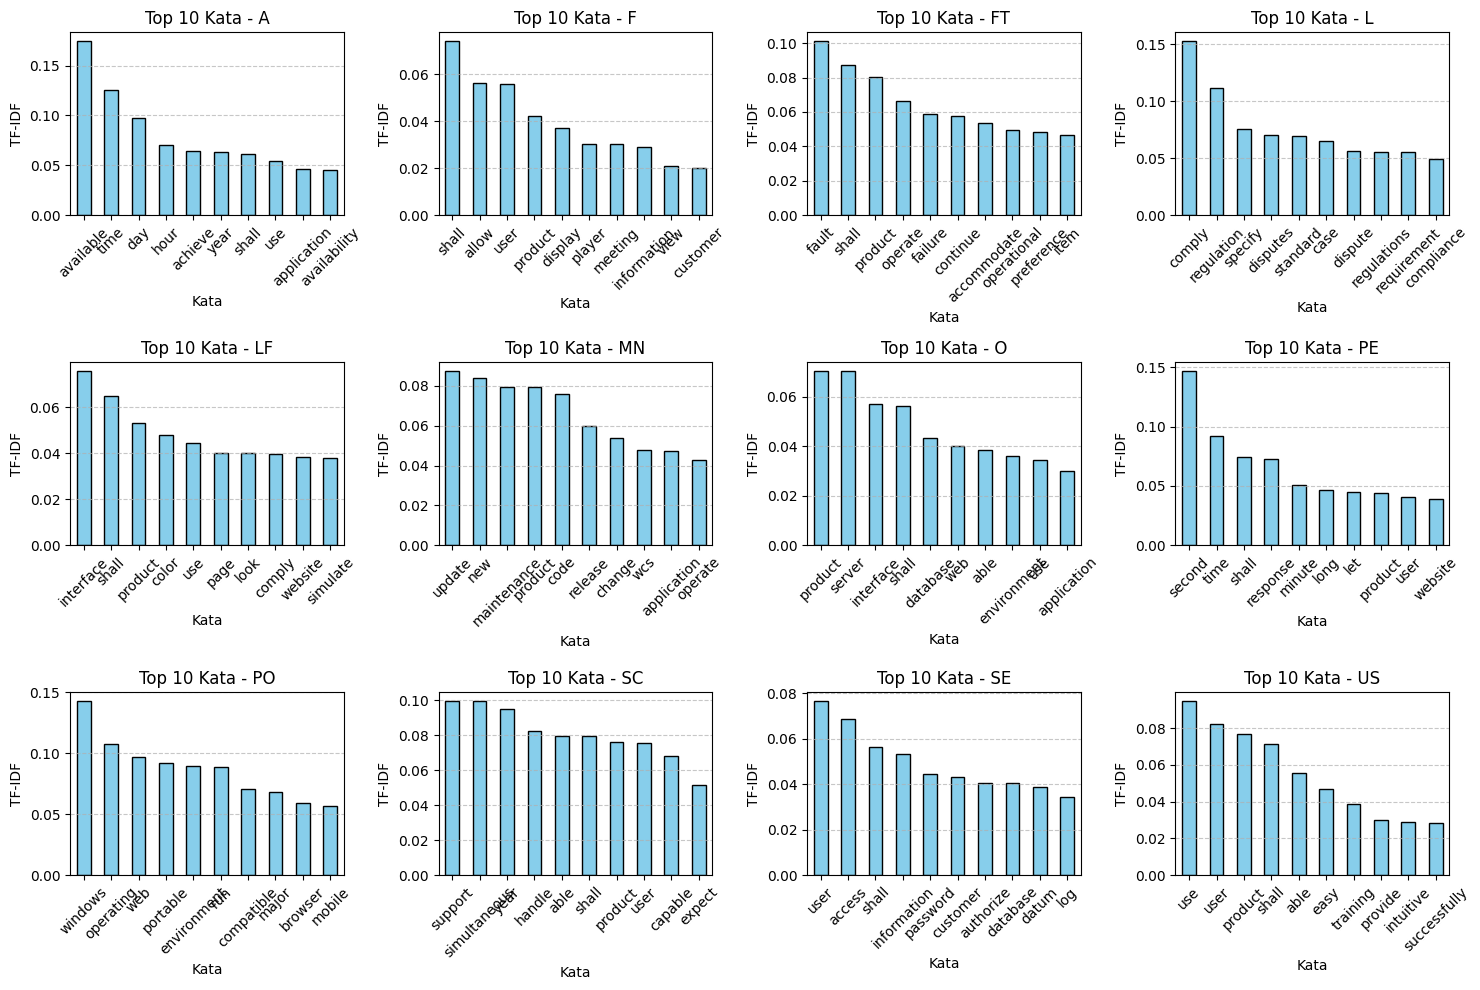

In [ ]:
# Menentukan jumlah kata yang ingin ditampilkan
top_n = 10

# Menentukan jumlah kategori
num_categories = len(average_tfidf.index)

# Menentukan jumlah baris dan kolom
rows, cols = 3, 4

# Membuat figure dan axes untuk multiple subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Sesuaikan ukuran

# Flatten axes untuk mempermudah iterasi jika jumlah kategori tidak pas dengan grid
axes = axes.flatten()

# Loop untuk setiap kategori dan subplot masing-masing
for i, category in enumerate(average_tfidf.index):
    top_words = average_tfidf.loc[category].nlargest(top_n)  # Ambil top N kata untuk kategori ini
    ax = axes[i]  # Pilih subplot sesuai index

    top_words.plot(kind="bar", ax=ax, color="skyblue", edgecolor="black")

    ax.set_title(f"Top {top_n} Kata - {category}")
    ax.set_xlabel("Kata")
    ax.set_ylabel("TF-IDF")
    ax.tick_params(axis="x", rotation=45)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Menghapus subplot kosong jika jumlah kategori < total subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Hapus subplot yang tidak terpakai

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

## 6.	Explore datasets based on POS

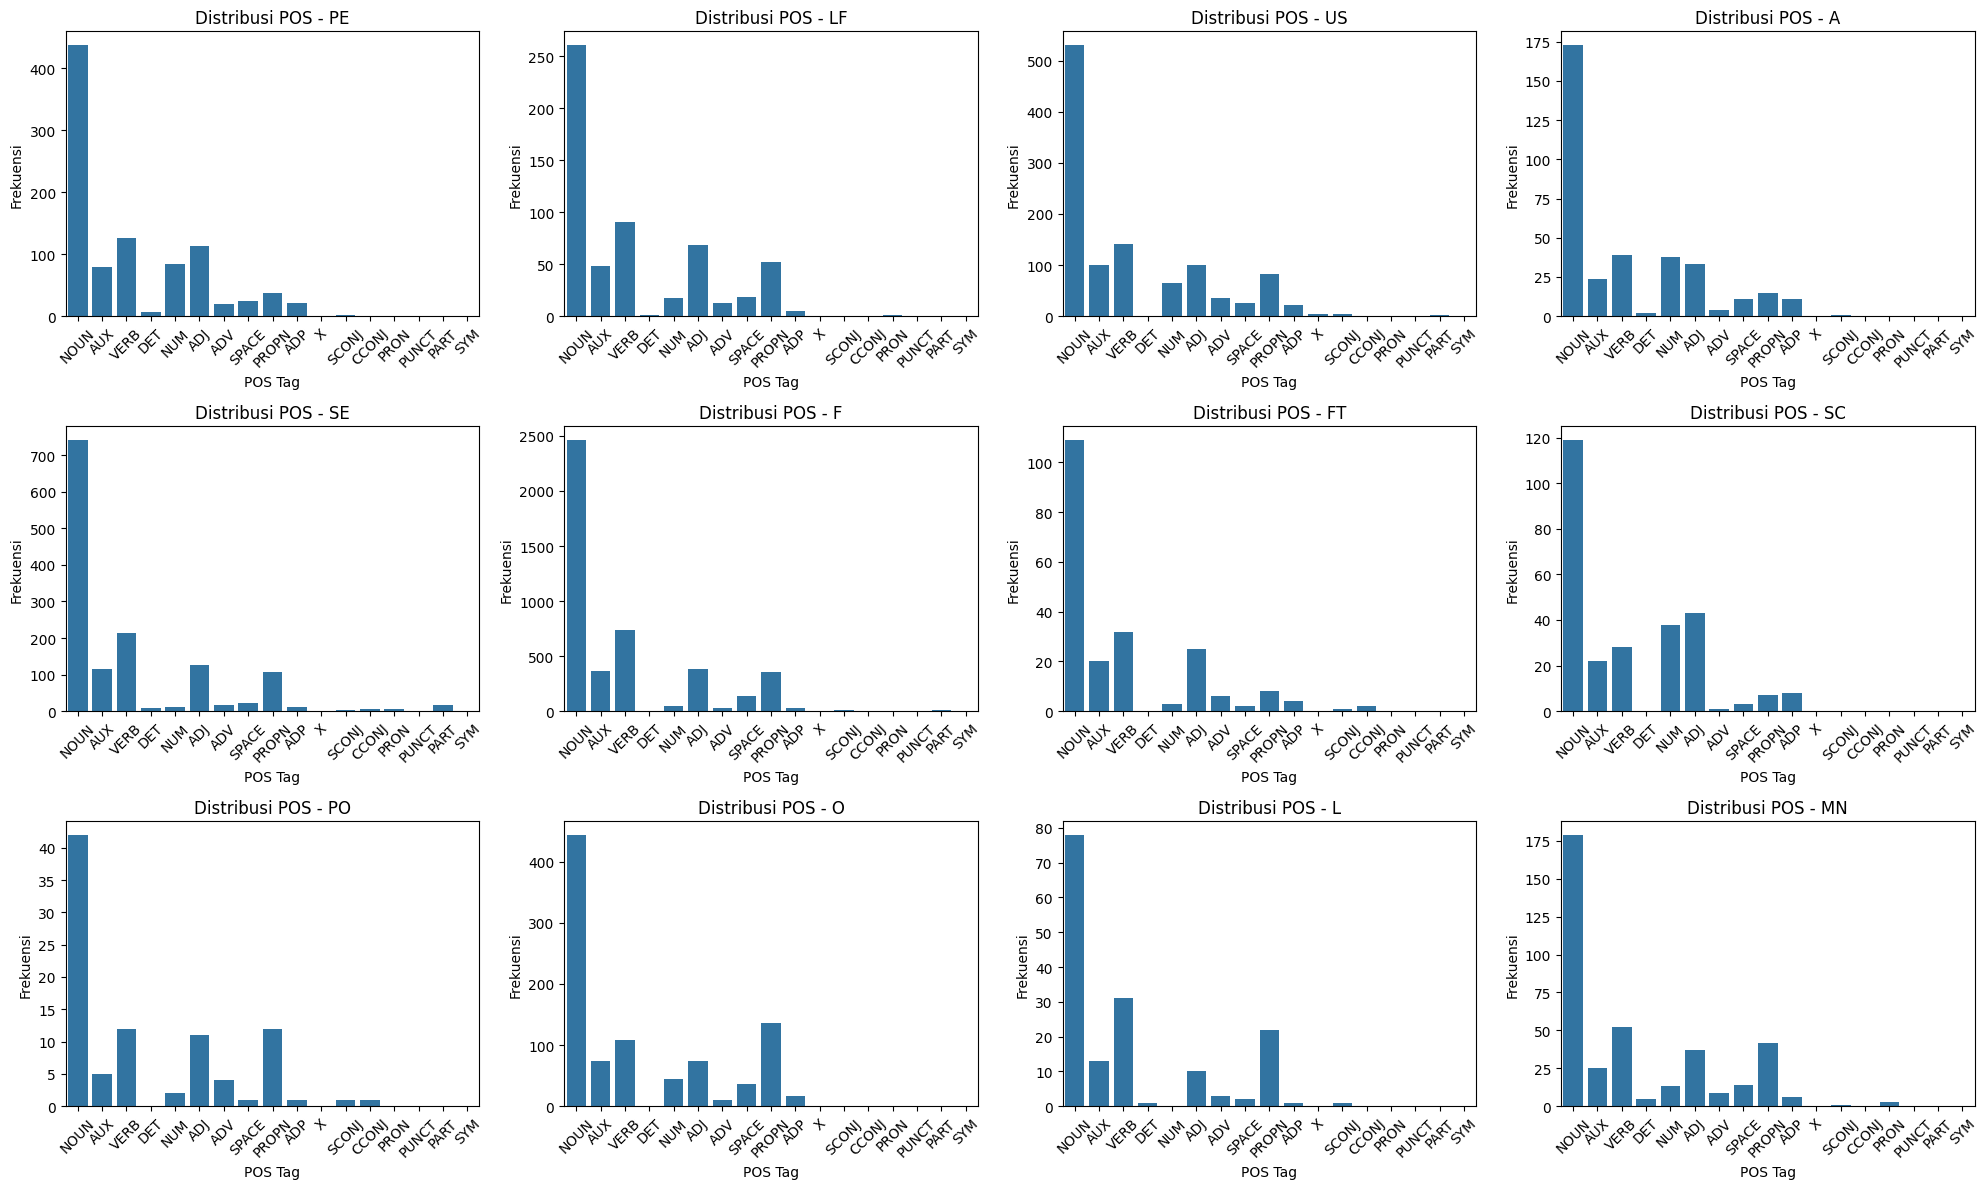

In [ ]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat model bahasa Inggris dari spaCy
nlp = spacy.load('en_core_web_sm')

# Dictionary untuk menyimpan hasil analisis POS berdasarkan kategori
pos_counts = {}

for category in text_req['_class_'].unique():
    pos_counts[category] = {}  # Dictionary untuk menyimpan jumlah POS per kategori

    # Filter dataset berdasarkan kategori
    subset = text_req[text_req['_class_'] == category]

    # Iterasi setiap teks dalam kategori ini
    for idx, row in subset.iterrows():
        sample_text = row['Processed_Requirement']
        doc = nlp(sample_text)  # Analisis teks dengan spaCy

        # Hitung jumlah POS tags
        for token in doc:
            pos_tag = token.pos_
            pos_counts[category][pos_tag] = pos_counts[category].get(pos_tag, 0) + 1

# Mengubah hasil ke dalam DataFrame
df_pos = pd.DataFrame(pos_counts).fillna(0)

# Transpose agar lebih mudah divisualisasikan
df_pos = df_pos.T  # Baris -> Kategori, Kolom -> POS tags

# Menampilkan beberapa subplots untuk setiap kategori
num_categories = len(df_pos)
rows, cols = 3, 4  # Layout grid (3x4)
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))

# Flatten axes agar bisa digunakan dalam loop
axes = axes.flatten()

# Plot distribusi POS untuk setiap kategori
for i, category in enumerate(df_pos.index):
    ax = axes[i]
    sns.barplot(x=df_pos.columns, y=df_pos.loc[category], ax=ax)

    ax.set_title(f"Distribusi POS - {category}")
    ax.set_xlabel("POS Tag")
    ax.set_ylabel("Frekuensi")

    # Perbaikan set_ticks agar tidak ada warning
    ax.set_xticks(range(len(df_pos.columns)))
    ax.set_xticklabels(df_pos.columns, rotation=45)

# Hapus subplot kosong jika jumlah kategori tidak pas dengan grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()